# EDA

## Чтение данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Устанавливаем минималистичный стиль
def set_eda_style():
    """Минималистичный стиль для EDA анализа"""
    plt.style.use('default')
    custom_params = {
        'figure.figsize': (12, 6),
        'font.size': 11,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'grid.alpha': 0.3,
        'grid.linestyle': '--',
        'figure.facecolor': 'white',
        'axes.facecolor': 'white',
        'savefig.dpi': 300,
        'savefig.bbox': 'tight'
    }
    plt.rcParams.update(custom_params)

In [3]:
data = pd.read_excel('social_network.xlsx')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.head()

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN


In [6]:
data.shape

(56820, 25)

Имеется 56 820 строк и 25 признаков

## Пропущенные значения и типы

In [7]:
data.isnull().sum()

review_dttm                       0
finish_dttm                      94
id_client                         0
company                           0
review_mark                       0
review_emotion                    0
review_source                     0
business_line                     0
product                           0
reason                            0
review_theme                      0
subtheme                          0
review_text                    2097
solution_flg                      0
gender_cd                       325
education_level_cd            31828
marital_status_cd             18844
children_cnt                  13478
citizenship_country             121
segment_name                  13212
subscription_important_flg    13212
new_flg                       13212
influencer_flg                13212
age_segment                   10767
csat_score                    53413
dtype: int64

Много пропущенных значений в информации про клиентов

In [8]:
data.dtypes

review_dttm                   datetime64[ns]
finish_dttm                   datetime64[ns]
id_client                             object
company                               object
review_mark                           object
review_emotion                        object
review_source                         object
business_line                         object
product                               object
reason                                object
review_theme                          object
subtheme                              object
review_text                           object
solution_flg                          object
gender_cd                             object
education_level_cd                    object
marital_status_cd                     object
children_cnt                         float64
citizenship_country                   object
segment_name                          object
subscription_important_flg           float64
new_flg                              float64
influencer

## Знакомство с данными

In [9]:
data['company'].value_counts()

company
Банк            34356
Страховая        9714
Инвест           5474
SME              5381
Мобайл           1247
Плашки Media      602
ТРабота            46
Name: count, dtype: int64

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\2466067164.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


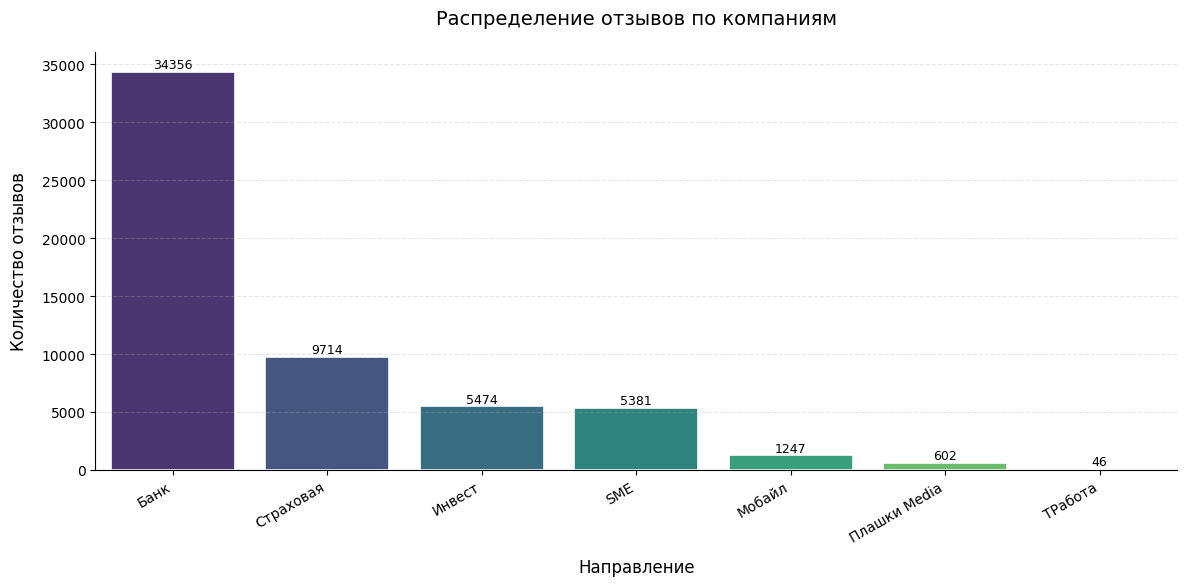

In [10]:
# Применяем стиль
set_eda_style()

# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 6))

# Получаем данные для визуализации
value_counts = data['company'].value_counts()

# Строим barplot с улучшенными параметрами
sns.barplot(x=value_counts.index, 
            y=value_counts.values, 
            ax=ax,
            palette='viridis',  # Семантическая палитра
            edgecolor='white',
            linewidth=1.2)

# Настройка осей и заголовка
ax.set_title('Распределение отзывов по компаниям', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Направление', labelpad=10)
ax.set_ylabel('Количество отзывов', labelpad=10)

# Поворот подписей на оси X с выравниванием
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Добавляем значения над столбцами для наглядности
for i, v in enumerate(value_counts.values):
    ax.text(i, v + max(value_counts.values)*0.01, str(v), 
            ha='center', 
            fontsize=9,
            fontweight='medium')

# Добавляем легкую сетку для лучшей читаемости
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Настраиваем отступы и отображаем
plt.tight_layout()
plt.show()

60% от всех отзывов составляет банковский сектор.

In [11]:
data['review_mark'].value_counts()

review_mark
5                           33785
1                            9991
без оценки (негативный)      8954
без оценки (нейтральный)     1782
2                            1096
4                             590
3                             475
без оценки (позитивный)       147
Name: count, dtype: int64

In [12]:
# приведем все к пятибольной системе
data.loc[data['review_mark'] == 'без оценки (негативный)', 'review_mark'] = '1'
data.loc[data['review_mark'] == 'без оценки (нейтральный)', 'review_mark'] = '3'
data.loc[data['review_mark'] == 'без оценки (позитивный)', 'review_mark'] = '5'

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\3968684059.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


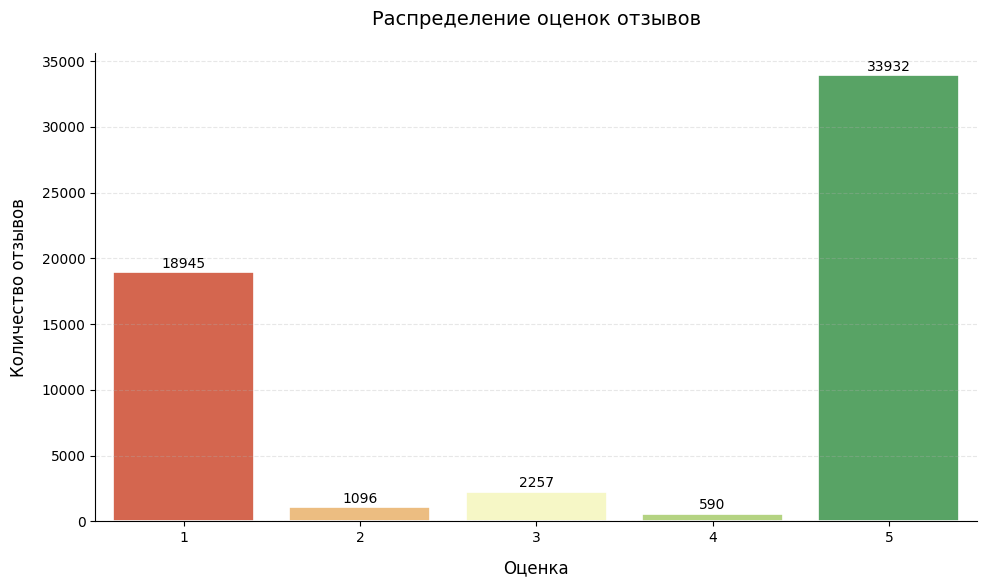

In [13]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Получаем данные для визуализации (сортировка по индексу для порядковых данных)
value_counts = data['review_mark'].value_counts().sort_index()

# Строим barplot с улучшенными параметрами
sns.barplot(x=value_counts.index, 
            y=value_counts.values, 
            ax=ax,
            palette='RdYlGn',  # Красно-желто-зеленая палитра для оценок
            edgecolor='white',
            linewidth=1.2,
            order=value_counts.index)  # Сохраняем порядок сортировки

# Настройка осей и заголовка
ax.set_title('Распределение оценок отзывов', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Оценка', labelpad=10)
ax.set_ylabel('Количество отзывов', labelpad=10)

# Добавляем значения над столбцами
for i, v in enumerate(value_counts.values):
    ax.text(i, v + max(value_counts.values)*0.01, str(v), 
            ha='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Настраиваем отступы и отображаем
plt.tight_layout()
plt.show()

33% отзывов имеют оценку 1, 60% отзывов имеют оценку 5, 3% имеют оценку 2-4. 

In [14]:
data['review_emotion'].value_counts(dropna = False)

review_emotion
Позитивный    34522
Негативный    22298
Name: count, dtype: int64

In [16]:
data['review_source'].value_counts(dropna = False)

review_source
banki.ru          48224
sravni.ru          3541
пульс              1280
otzovik             857
нет                 602
asn                 594
пикабу              517
вконтакте           418
суперапп            308
vc                  255
иная площадка        96
twitter              54
irecommend           32
одноклассники        26
яндекс карты          7
форум banki.ru        3
instagramm            2
гугл карты            2
youtube               1
appstore              1
Name: count, dtype: int64

In [17]:
#Введем категории: 
#'Банковские агрегаторы и СМИ': ['banki.ru', 'sravni.ru', 'форум banki.ru'],
#'Социальные сети': ['вконтакте', 'одноклассники', 'twitter', 'instagramm', 'пикабу', 'youtube'],
#'Платформы с отзывами': ['otzovik', 'irecommend', 'яндекс карты', 'гугл карты'],
#'Новостные/Медиа-площадки': ['vc', 'пульс'],
#'Остальные': ['суперапп', 'appstore', 'нет', 'asn', 'иная площадка']

data.loc[data['review_source'].isin(['banki.ru', 'sravni.ru', 'форум banki.ru']), 'review_source'] = 'Банковские агрегаторы и СМИ'
data.loc[data['review_source'].isin(['вконтакте', 'одноклассники', 'twitter', 'instagramm', 'пикабу', 'youtube']), 'review_source'] = 'Социальные сети'
data.loc[data['review_source'].isin(['otzovik', 'irecommend', 'яндекс карты', 'гугл карты']), 'review_source'] = 'Платформы с отзывами'
data.loc[data['review_source'].isin(['vc', 'пульс']), 'review_source'] = 'Новостные/Медиа-площадки'
data.loc[data['review_source'].isin(['суперапп', 'appstore', 'нет', 'asn', 'иная площадка']), 'review_source'] = 'Остальные'


C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\1530493916.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=value_counts_sorted.index,


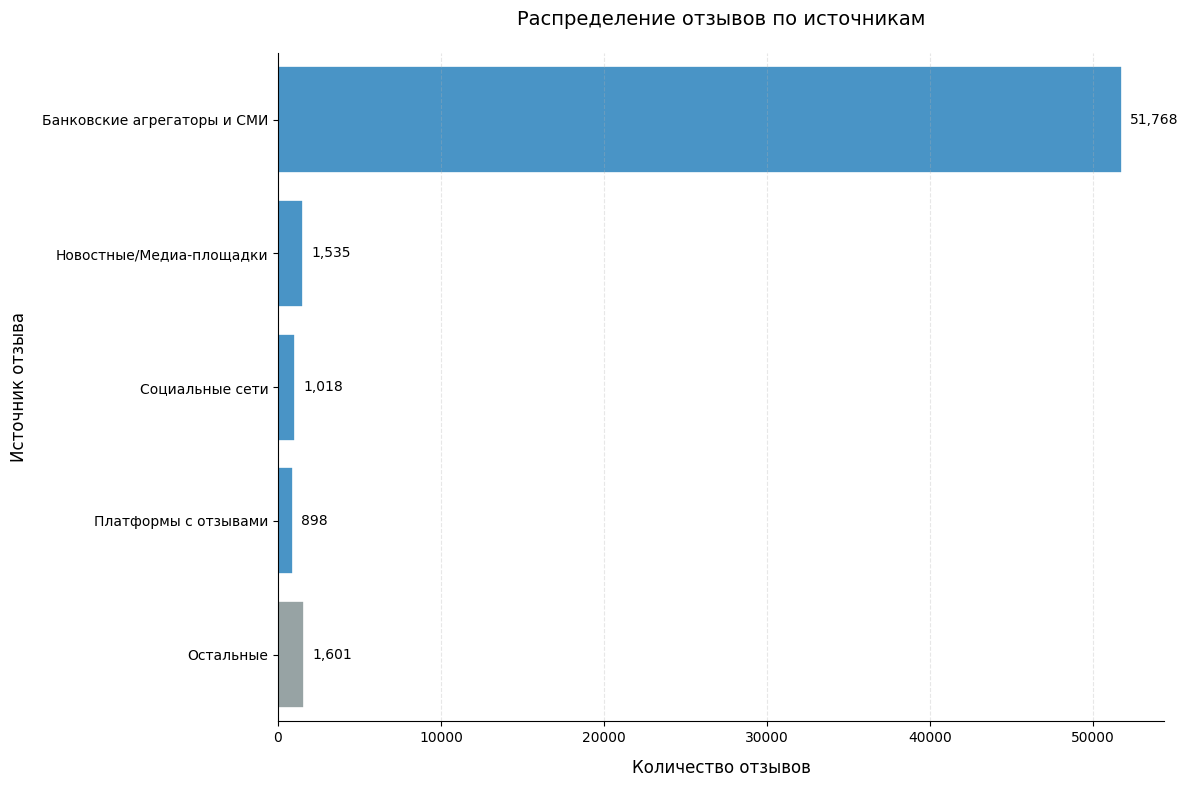

In [18]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Получаем данные
value_counts = data['review_source'].value_counts()

# Указываем точное название категории "остальные"
others_label = 'Остальные'  # Измените на актуальное название

if others_label in value_counts.index:
    # Разделяем данные
    others_value = value_counts[others_label]
    main_data = value_counts.drop(others_label).sort_values(ascending=False)
    
    # Объединяем (остальные в конце)
    value_counts_sorted = pd.concat([main_data, pd.Series([others_value], index=[others_label])])
else:
    value_counts_sorted = value_counts.sort_values(ascending=False)

# Строим график
sns.barplot(y=value_counts_sorted.index, 
            x=value_counts_sorted.values, 
            ax=ax,
            palette=['#3498db']*(len(value_counts_sorted)-1) + ['#95a5a6'],  # Синие + серый для остальных
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Распределение отзывов по источникам', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Источник отзыва', labelpad=10)

# Добавляем значения
for i, v in enumerate(value_counts_sorted.values):
    ax.text(v + max(value_counts_sorted.values)*0.01, i, f'{v:,}', 
            va='center', fontsize=10, fontweight='medium')

# Добавляем сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Не менее 90% отзывов из банковских агрегаторов и СМИ, на другие источники приходится меньше 10%.

In [19]:
data['business_line'].value_counts(dropna = False)

business_line
депозитные продукты           19144
страховая                      9801
премиальные сервисы            6754
инвестиции                     5492
sme                            5387
кредитные карты                3084
автокредит                     1141
нефинансовые продукты          1101
прочие продукты                 973
mobile                          779
поддержка сотрудников           744
Не определено                   698
кредит наличными                535
ипотека                         405
кредит наличными под залог      244
кредит на покупку               214
долями                          119
семейный банк                    96
кубышка                          68
рефинансирование                 21
депозиты                         11
кредиты                           3
инвест                            3
равнодушие                        1
страхование                       1
бэк-офис                          1
Name: count, dtype: int64

Так как далее мы будем исследовать проблемы бизнес-линий, то сгруппируем их. Получается 5 категорий.

In [20]:
# Введем категории:
# Депозиты: ['депозитные продукты', 'депозиты', 'кубышка']
# Кредиты: ['кредитные карты', 'автокредит', 'кредит наличными', 'ипотека', 'кредит наличными под залог', 'кредит на покупку', 'рефинансирование']
# Инвестиции: ['инвестиции', 'долями', 'инвест']
# Страхование: ['страховая', 'страхование']
# Услуги и сервис: ['sme', 'премиальные сервисы', 'семейный банк', 'mobile', 'бэк-офис', 'поддержка сотрудников', 'нефинансовые продукты', 'прочие продукты', 'Не определено', 'равнодушие', 'кредиты']

data.loc[data['business_line'].isin(['депозитные продукты', 'депозиты', 'кубышка']), 'business_line'] = 'Депозиты'
data.loc[data['business_line'].isin(['кредитные карты', 'автокредит', 'кредит наличными', 'ипотека', 
                                     'кредит наличными под залог', 'кредит на покупку', 'рефинансирование']), 'business_line'] = 'Кредиты'
data.loc[data['business_line'].isin(['инвестиции', 'долями', 'инвест']), 'business_line'] = 'Инвестиции'
data.loc[data['business_line'].isin(['страховая', 'страхование']), 'business_line'] = 'Страхование'
data.loc[data['business_line'].isin(['sme', 'премиальные сервисы', 'семейный банк', 'mobile', 
                                     'бэк-офис', 'поддержка сотрудников', 'нефинансовые продукты', 
                                     'прочие продукты', 'Не определено', 'равнодушие', 'кредиты']), 'business_line'] = 'Услуги и сервис'

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\2949712357.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index,


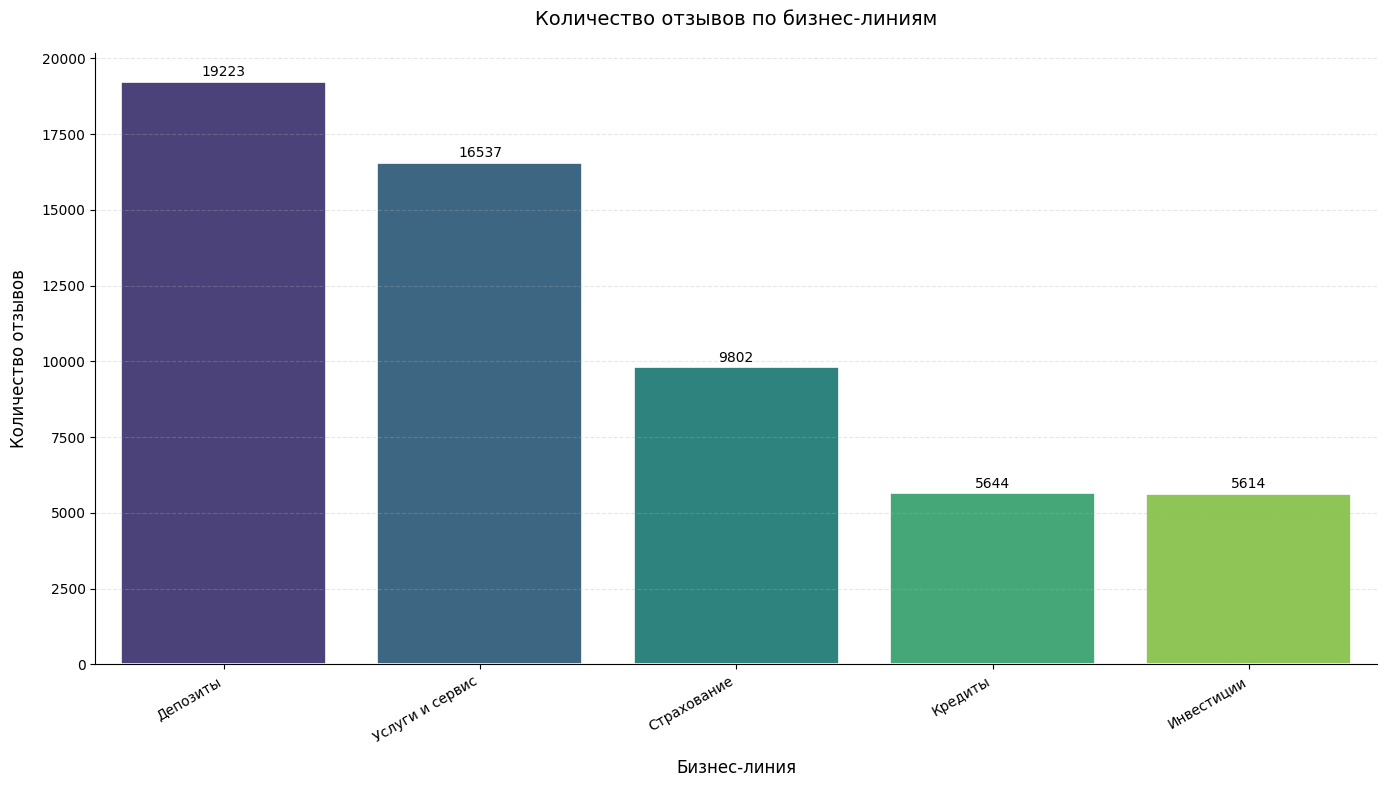

In [21]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(14, 8))

# Получаем данные для визуализации, сортируем по убыванию
value_counts = data['business_line'].value_counts().sort_values(ascending=False)

# Определяем палитру - можно использовать последовательную для ранжированных данных
palette = 'viridis'  # или 'mako', 'rocket', 'crest'

# Если хотим выделить топ-1 цветом, остальные другими оттенками:
# palette = ['#2E86AB'] + ['#4ECDC4']*(len(value_counts)-1)  # первый выделен, остальные одним цветом

# Строим barplot с отсортированными данными
sns.barplot(x=value_counts.index, 
            y=value_counts.values, 
            ax=ax,
            palette=palette,
            edgecolor='white',
            linewidth=1.2,
            order=value_counts.index)  # Важно: передаем порядок для сохранения сортировки

# Настройка осей и заголовка
ax.set_title('Количество отзывов по бизнес-линиям', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Бизнес-линия', labelpad=10)
ax.set_ylabel('Количество отзывов', labelpad=10)

# Поворот подписей на оси X для лучшей читаемости
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Добавляем значения над столбцами
for i, v in enumerate(value_counts.values):
    ax.text(i, v + max(value_counts.values)*0.01, str(v), 
            ha='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Настраиваем отступы и отображаем
plt.tight_layout()
plt.show()

Депозиты и услуги и сервисы - 2 наиболее крупные категории. Суммарно на них приходится примерно 63% всех отзывов. 

Кредиты и инвестиции - 2 наименее крупных, и их примерно поровну.

In [22]:
data['product'].value_counts(dropna = False).head(30)

product
дебетовая карта                            18637
premium                                     6533
взр                                         4732
брокерский счет                             4027
расчетный счет                              3451
не определено                               3410
осаго                                       3074
кредитная карта                             3064
каско                                       1500
мобайл                                       778
Не определено                                698
онлайн-бухгалтерия                           607
автокредит в салонах                         513
кредит наличными                             492
подписки                                     471
ифл                                          340
иис                                          338
автокредит наличными                         320
торговый эквайринг                           312
вклад                                        267
lifestyle   

In [23]:
data.groupby('business_line')['product'].nunique()

business_line
Депозиты           11
Инвестиции          5
Кредиты            18
Страхование         7
Услуги и сервис    40
Name: product, dtype: int64

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\3712764236.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_products.index,


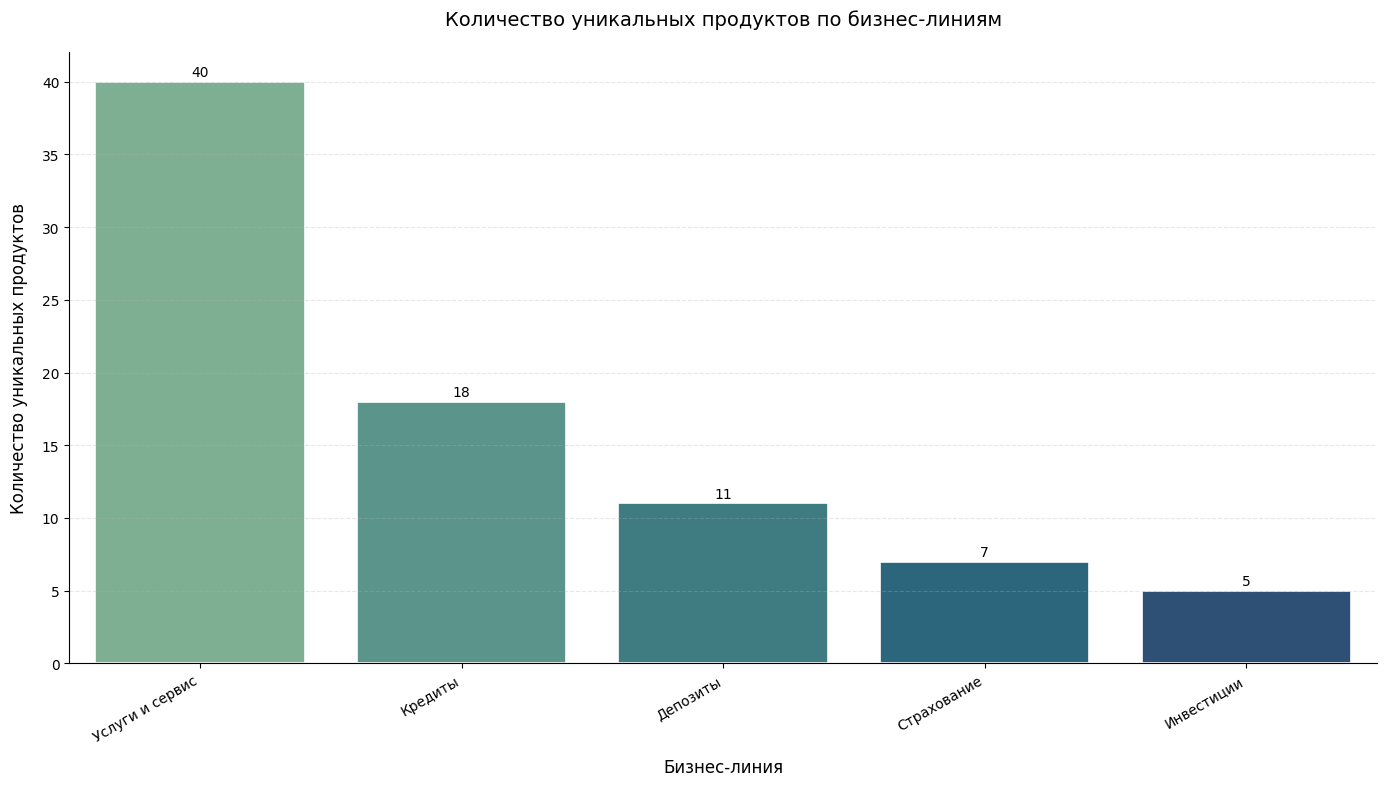

In [24]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(14, 8))

# Получаем данные: количество уникальных продуктов по бизнес-линиям
unique_products = data.groupby('business_line')['product'].nunique().sort_values(ascending=False)

# Строим barplot с отсортированными данными
sns.barplot(x=unique_products.index, 
            y=unique_products.values, 
            ax=ax,
            palette='crest',  # Градиентная палитра для числовых значений
            edgecolor='white',
            linewidth=1.2,
            order=unique_products.index)  # Сохраняем сортировку

# Настройка осей и заголовка
ax.set_title('Количество уникальных продуктов по бизнес-линиям', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Бизнес-линия', labelpad=10)
ax.set_ylabel('Количество уникальных продуктов', labelpad=10)

# Поворот подписей на оси X
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

# Добавляем значения над столбцами
for i, v in enumerate(unique_products.values):
    ax.text(i, v + max(unique_products.values)*0.01, str(v), 
            ha='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

В услугах и сервисах примерно 50% всех уникальных продуктов компании.

In [25]:
pivot_table = data.pivot_table(
    index='business_line', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)
pivot_table

review_emotion,Негативный,Позитивный
business_line,,
Депозиты,10675,8548
Инвестиции,2018,3596
Кредиты,4479,1165
Страхование,1220,8582
Услуги и сервис,3906,12631


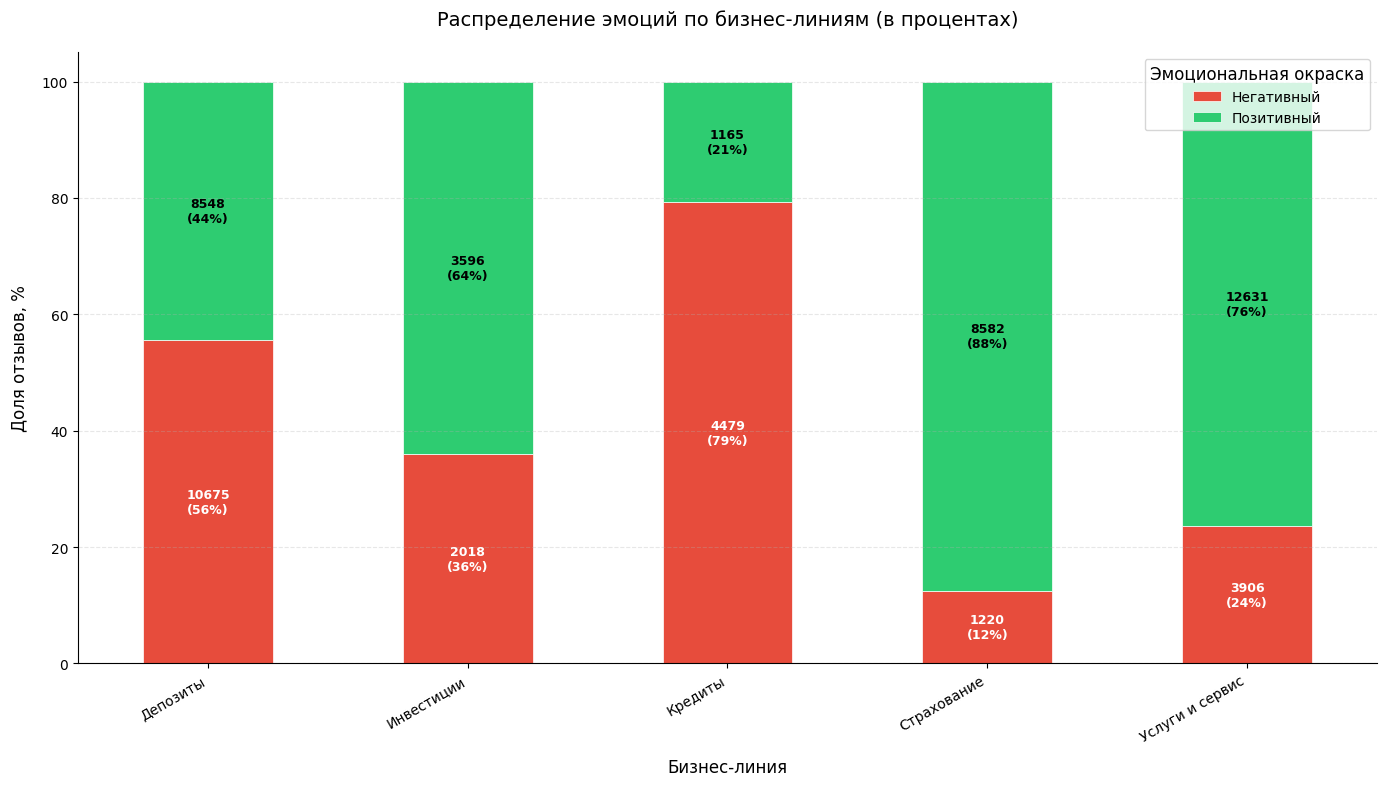

In [26]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(14, 8))

# Рассчитываем процентное соотношение
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# ПРОБЛЕМА БЫЛА ЗДЕСЬ: colors не был определен
# Исправляем - задаем цвета для двух эмоций
colors = ['#e74c3c', '#2ecc71']  # Зеленый и красный

# Строим stacked bar plot с процентами
bars = pivot_table_percent.plot(kind='bar', 
                                stacked=True, 
                                ax=ax, 
                                color=colors,  # ТЕПЕРЬ ЦВЕТА ПРИМЕНЯТСЯ
                                edgecolor='white',
                                linewidth=0.5)

# Остальной код без изменений...
ax.set_title('Распределение эмоций по бизнес-линиям (в процентах)', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Бизнес-линия', labelpad=10)
ax.set_ylabel('Доля отзывов, %', labelpad=10)

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
ax.legend(title='Эмоциональная окраска', title_fontsize=12, fontsize=10, frameon=True)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Добавляем аннотации
for i, (idx, row) in enumerate(pivot_table.iterrows()):
    cumulative = 0
    for emotion, value in row.items():
        if value > 0:
            percentage = (value / row.sum()) * 100
            if percentage > 5:
                text_color = 'white' if emotion == 'Негативный' else 'black'
                ax.text(i, cumulative + percentage/2, 
                        f'{value}\n({percentage:.0f}%)', 
                        ha='center', va='center',
                        fontsize=9, color=text_color,
                        fontweight='bold')
            cumulative += percentage

plt.tight_layout()
plt.show()

По депозитам доля негативных отзывов больше доли положительных на 12 pp.

По инвестициям, страхованию и услугам и сервису больше положительных отзывов. По страхованию примерно 9 из 10 клиентов оставляют положительный отзыв.

По кредиту на каждый положительный отзыв приходится 4 отрицательных.

In [27]:
data['reason'].value_counts(dropna = False)

reason
Не определено                        52452
общая информация                       311
заявки                                 216
акции                                  212
финансовая информация                  169
                                     ...  
привлечение на инвестиции премиум        1
фрод-мониторинг мобайл                   1
плохое качество услуг                    1
металлическая карта                      1
условия вознаграждений/премии            1
Name: count, Length: 190, dtype: int64

In [28]:
data['review_theme'].value_counts(dropna = False)

review_theme
тарифы и условия                 14080
страховое событие                 8762
платежи, переводы и операции      4898
карты                             4365
кэшбек                            4220
дополнительные услуги             2752
акции                             2161
aml                               2101
заявки                            1983
мп/лк/терминал                    1956
погашение кредитных продуктов     1937
Не определено                     1377
ценные бумаги                     1055
документы и справки               1016
расторжение договора               851
коммуникации клиентам              802
доставки                           652
налоги                             606
обеспечительные меры               579
изменение данных                   401
нефинансовые услуги                207
оформление                          18
увольнение                          14
условия работы                       8
качество связи                       6
перенос номе

In [29]:
data['subtheme'].value_counts(dropna = False).head(20)

subtheme
консультация по продукту                            9605
консультации по существующему страховому событию    8004
отмена / оспаривание                                3690
блокировка карты                                    3583
корректировка кэшбека                               2576
возвраты                                            2350
консультация по услуге                              1689
консультация по ограничениям и документам           1327
оформление заявки                                   1154
условия акции                                        978
Не определено                                        966
комиссии                                             872
консультация по интерфейсу                           862
отключить услугу                                     843
не был начислен                                      790
жалоба по страховому случаю                          700
общие условия по кэшбеку                             649
консультация по ценным

Более узкая тема позволяет понять о чем отзыв.

In [30]:
data['solution_flg'].value_counts(dropna = False)

solution_flg
не указано         43661
проблема решена    13159
Name: count, dtype: int64

In [31]:
data['gender_cd'].value_counts(dropna = False)

gender_cd
M      33364
F      23131
NaN      325
Name: count, dtype: int64

In [32]:
data['education_level_cd'].value_counts(dropna = False)

education_level_cd
NaN    31828
GRD    15006
SCH     4685
UGR     3904
PGR      997
ACD      399
MGR        1
Name: count, dtype: int64

In [33]:
data['education_level_cd'].value_counts(dropna = False)

education_level_cd
NaN    31828
GRD    15006
SCH     4685
UGR     3904
PGR      997
ACD      399
MGR        1
Name: count, dtype: int64

In [34]:
data['children_cnt'].value_counts(dropna = False)

children_cnt
0.0    41170
NaN    13478
1.0     1310
2.0      697
3.0      142
4.0       21
6.0        2
Name: count, dtype: int64

In [35]:
data['citizenship_country'].value_counts(dropna = False)

citizenship_country
РФ                           55672
БЕЛАРУСЬ                       263
КАЗАХСТАН                      175
NaN                            121
УЗБЕКИСТАН                     102
                             ...  
ЯПОНИЯ                           1
ГЕРМАНИЯ                         1
ХОРВАТИЯ                         1
ДНР                              1
КОНГО, ДЕМОКР. РЕСПУБЛИКА        1
Name: count, Length: 64, dtype: int64

In [36]:
data['segment_name'].value_counts(dropna = False)

segment_name
Доходные                 22157
Малодоходные             15964
NaN                      13212
Высокодоходные без ПМ     2418
Высокодоходные с ПМ       1686
Защищенные                1383
Name: count, dtype: int64

In [37]:
data['subscription_important_flg'].value_counts(dropna = False)

subscription_important_flg
0.0    41924
NaN    13212
1.0     1684
Name: count, dtype: int64

In [38]:
data['new_flg'].value_counts(dropna = False)

new_flg
0.0    42666
NaN    13212
1.0      942
Name: count, dtype: int64

In [39]:
pivot_table = data.pivot_table(
    index='new_flg', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)
pivot_table

review_emotion,Негативный,Позитивный
new_flg,,
0.0,18452,24214
1.0,500,442


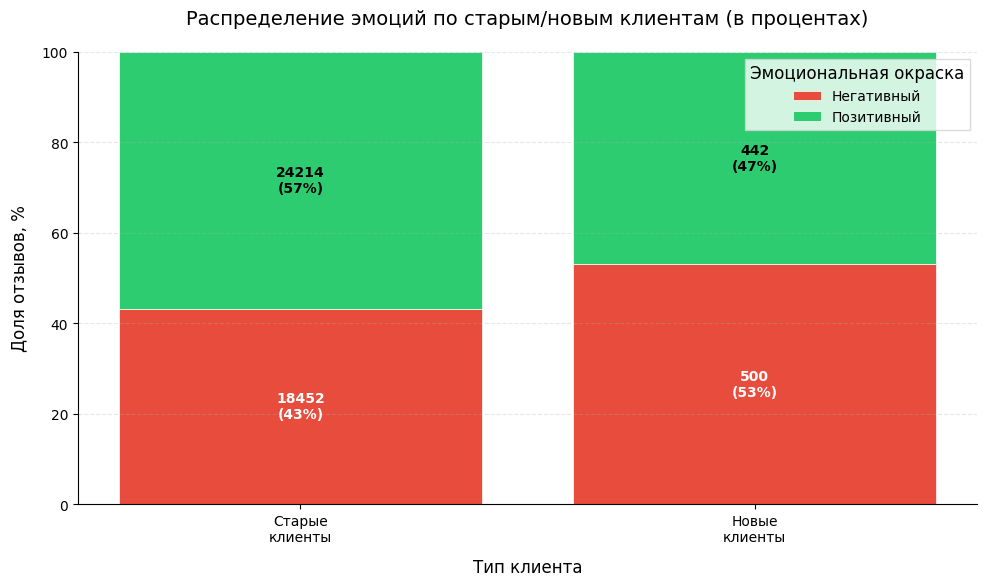

In [40]:
# Создаем сводную таблицу
pivot_table = data.pivot_table(
    index='new_flg', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)

# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Рассчитываем процентное соотношение
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Упорядочиваем эмоции: сначала негативные, потом позитивные
# Создаем список эмоций в нужном порядке
emotions = []
if 'Негативный' in pivot_table_percent.columns:
    emotions.append('Негативный')

if 'Позитивный' in pivot_table_percent.columns:
    emotions.append('Позитивный')

# Переиндексируем таблицу в нужном порядке
pivot_table_percent = pivot_table_percent[emotions]
pivot_table = pivot_table[emotions]

# Цвета для эмоций
colors = ['#e74c3c', '#2ecc71']  # Красный для негативных, зеленый для позитивных

# Строим stacked bar plot с процентами
bottom = np.zeros(len(pivot_table_percent))
for idx, (emotion, color) in enumerate(zip(emotions, colors)):
    values = pivot_table_percent[emotion].values
    ax.bar(range(len(pivot_table_percent)), values, bottom=bottom, 
           color=color, edgecolor='white', linewidth=0.5, label=emotion)
    bottom += values

# Настройка осей и заголовка
ax.set_title('Распределение эмоций по старым/новым клиентам (в процентах)', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Тип клиента', labelpad=10)
ax.set_ylabel('Доля отзывов, %', labelpad=10)

# Преобразуем метки на оси X в понятные названия и делаем их горизонтальными
x_labels = []
x_positions = range(len(pivot_table_percent))
for label in pivot_table_percent.index:
    if label == 1 or label == '1' or str(label).lower() == 'true' or str(label).lower() == 'новый':
        x_labels.append('Новые\nклиенты')
    elif label == 0 or label == '0' or str(label).lower() == 'false' or str(label).lower() == 'старый':
        x_labels.append('Старые\nклиенты')
    else:
        x_labels.append(str(label))

ax.set_xticks(x_positions)
ax.set_xticklabels(x_labels, rotation=0, ha='center')  # rotation=0 для горизонтальных подписей

# Добавляем легенду
ax.legend(title='Эмоциональная окраска', 
          title_fontsize=12,
          fontsize=10,
          frameon=True,
          fancybox=False,
          edgecolor='lightgray')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Убираем верхнюю и правую границы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем аннотации с абсолютными значениями и процентами
for i in range(len(pivot_table_percent)):
    cumulative = 0
    for j, emotion in enumerate(emotions):
        percent = pivot_table_percent.iloc[i, j]
        abs_value = pivot_table.iloc[i, j]
        if abs_value > 0:
            # Выбираем цвет текста
            text_color = 'white' if j == 0 else 'black'  # Первая эмоция (негативная) - белый текст
            
            ax.text(i, cumulative + percent/2, 
                    f'{abs_value}\n({percent:.0f}%)', 
                    ha='center', va='center',
                    fontsize=10, color=text_color,
                    fontweight='bold')
        cumulative += percent

# Настраиваем пределы оси Y (0-100%)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

Положительные и негативные отзывы делятся примерно пополам, что для новых, что для старых клиентов.

In [41]:
data['influencer_flg'].value_counts(dropna = False)

influencer_flg
0.0    29451
1.0    14157
NaN    13212
Name: count, dtype: int64

In [42]:
pivot_table = data.pivot_table(
    index='influencer_flg', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)
pivot_table

review_emotion,Негативный,Позитивный
influencer_flg,,
0.0,13574,15877
1.0,5378,8779


Эмоции в данных: ['Негативный', 'Позитивный']


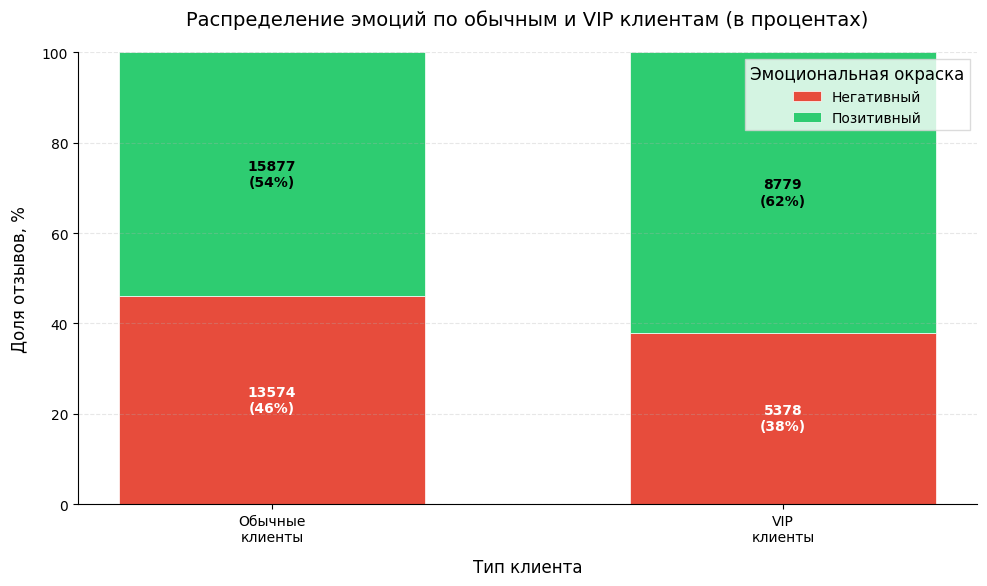

In [43]:
# Создаем сводную таблицу
pivot_table = data.pivot_table(
    index='influencer_flg', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)

# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(10, 6))

# Рассчитываем процентное соотношение
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# ВАЖНО: Проверяем, какие именно названия эмоций есть в данных
print("Эмоции в данных:", pivot_table.columns.tolist())

# Упорядочиваем эмоции: Отрицательный (красный) -> Положительный (зеленый)
# Поскольку вы сказали, что эмоций всего 2, берем их в правильном порядке
emotion_order = ['Отрицательный', 'Положительный']

# Убедимся, что эти столбцы существуют в данных
available_emotions = []
for emotion in emotion_order:
    if emotion in pivot_table_percent.columns:
        available_emotions.append(emotion)

# Если порядок не совпадает, используем то, что есть
if not available_emotions:
    available_emotions = pivot_table_percent.columns.tolist()

# Переиндексируем таблицу в нужном порядке
pivot_table_percent = pivot_table_percent[available_emotions]
pivot_table = pivot_table[available_emotions]

# Цвета для эмоций: Красный для Отрицательный, Зеленый для Положительный
colors = ['#e74c3c', '#2ecc71']

# Строим stacked bar plot
bottom = np.zeros(len(pivot_table_percent))
for idx, (emotion, color) in enumerate(zip(available_emotions, colors[:len(available_emotions)])):
    values = pivot_table_percent[emotion].values
    ax.bar(range(len(pivot_table_percent)), values, bottom=bottom, 
           color=color, edgecolor='white', linewidth=0.5, label=emotion, width=0.6)
    bottom += values

# Настройка осей и заголовка
ax.set_title('Распределение эмоций по обычным и VIP клиентам (в процентах)', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Тип клиента', labelpad=10)
ax.set_ylabel('Доля отзывов, %', labelpad=10)

# Преобразуем метки на оси X в понятные названия
x_labels = []
for label in pivot_table_percent.index:
    if label == 1 or label == '1' or str(label).lower() in ['true', 'vip', 'инфлюенсер']:
        x_labels.append('VIP\nклиенты')
    elif label == 0 or label == '0' or str(label).lower() in ['false', 'обычный', 'regular']:
        x_labels.append('Обычные\nклиенты')
    else:
        x_labels.append(str(label))

# Устанавливаем горизонтальные подписи
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=0, ha='center')

# Добавляем легенду
ax.legend(title='Эмоциональная окраска', 
          title_fontsize=12,
          fontsize=10,
          frameon=True,
          fancybox=False,
          edgecolor='lightgray',
          loc='upper right')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Убираем верхнюю и правую границы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем аннотации с абсолютными значениями и процентами
for i in range(len(pivot_table_percent)):
    cumulative = 0
    for j, emotion in enumerate(available_emotions):
        percent = pivot_table_percent.iloc[i, j]
        abs_value = pivot_table.iloc[i, j]
        if abs_value > 0:
            # Выбираем цвет текста: для Отрицательный - белый, для Положительный - черный
            text_color = 'white' if j == 0 else 'black'
            
            ax.text(i, cumulative + percent/2, 
                    f'{abs_value}\n({percent:.0f}%)', 
                    ha='center', va='center',
                    fontsize=10, color=text_color,
                    fontweight='bold')
        cumulative += percent

# Настраиваем пределы оси Y (0-100%)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

VIP клиенты имеют большую долю положительных отзывов, чем обычные клиенты. 

И обычные, и VIP клиенты оставляют больше положительных отзывов.

In [44]:
data['age_segment'].value_counts(dropna = False)

age_segment
Взрослые        25088
NaN             10767
Молодежь         9525
Сеньоры          5869
Подростки        2964
Не определен     2582
Дети               25
Name: count, dtype: int64

In [45]:
pivot_table = data.pivot_table(
    index='age_segment', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)
pivot_table

review_emotion,Негативный,Позитивный
age_segment,,
Взрослые,10973,14115
Дети,12,13
Молодежь,4491,5034
Не определен,1125,1457
Подростки,1220,1744
Сеньоры,2557,3312


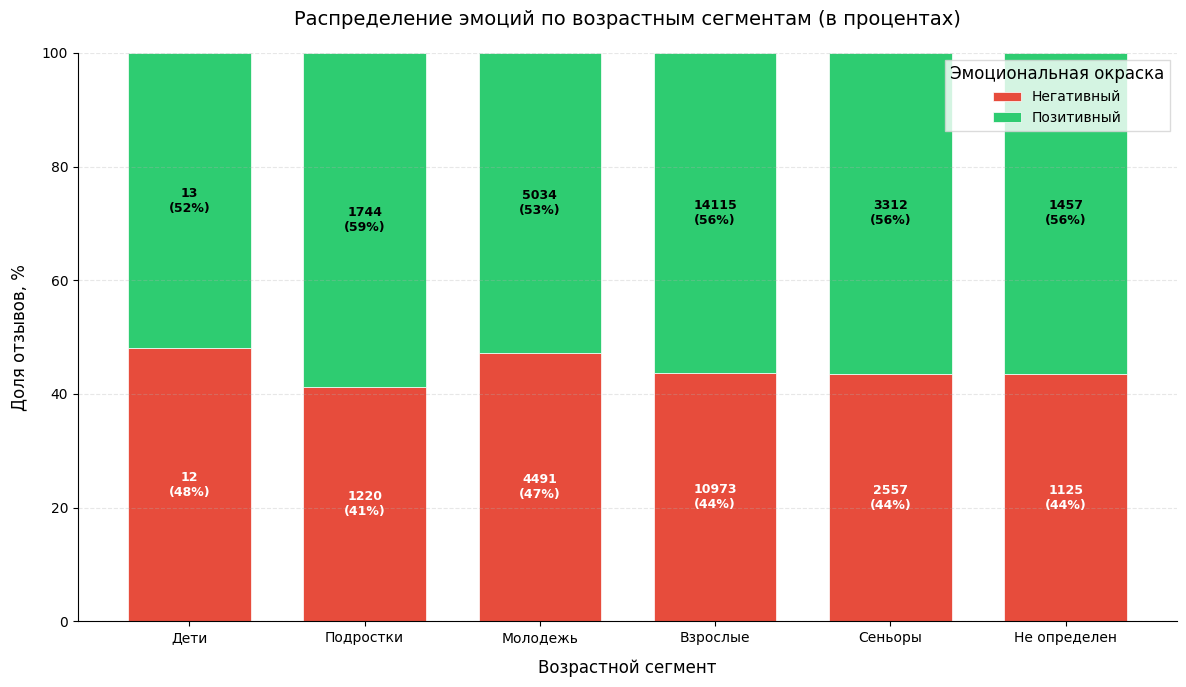

In [46]:
# Создаем сводную таблицу
pivot_table = data.pivot_table(
    index='age_segment', 
    columns='review_emotion', 
    aggfunc='size',
    fill_value=0
)

# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 7))

# Рассчитываем процентное соотношение
pivot_table_percent = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Определяем желаемый порядок возрастных сегментов
desired_order = ['Дети', 'Подростки', 'Молодежь', 'Взрослые', 'Сеньоры', 'Не определен']

# Оставляем только те сегменты, которые есть в данных
available_order = [segment for segment in desired_order if segment in pivot_table_percent.index]

# Переиндексируем таблицы в нужном порядке
pivot_table_percent = pivot_table_percent.reindex(available_order)
pivot_table = pivot_table.reindex(available_order)

# Упорядочиваем эмоции: сначала Отрицательный, потом Положительный
emotion_order = []
for emotion in ['Отрицательный', 'Положительный']:
    if emotion in pivot_table_percent.columns:
        emotion_order.append(emotion)

# Убедимся, что обе эмоции присутствуют
if len(emotion_order) == 2:
    pivot_table_percent = pivot_table_percent[emotion_order]
    pivot_table = pivot_table[emotion_order]
else:
    # Если порядок другой, используем то что есть
    emotion_order = pivot_table_percent.columns.tolist()

# Цвета для эмоций
colors = ['#e74c3c', '#2ecc71']  # Красный для отрицательных, зеленый для положительных

# Строим stacked bar plot
bottom = np.zeros(len(pivot_table_percent))
for idx, (emotion, color) in enumerate(zip(emotion_order, colors)):
    values = pivot_table_percent[emotion].values
    ax.bar(range(len(pivot_table_percent)), values, bottom=bottom, 
           color=color, edgecolor='white', linewidth=0.5, label=emotion, width=0.7)
    bottom += values

# Настройка осей и заголовка
ax.set_title('Распределение эмоций по возрастным сегментам (в процентах)', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Возрастной сегмент', labelpad=10)
ax.set_ylabel('Доля отзывов, %', labelpad=10)

# Устанавливаем подписи возрастных сегментов
ax.set_xticks(range(len(pivot_table_percent)))
ax.set_xticklabels(pivot_table_percent.index, rotation=0, ha='center')

# Добавляем легенду
ax.legend(title='Эмоциональная окраска', 
          title_fontsize=12,
          fontsize=10,
          frameon=True,
          fancybox=False,
          edgecolor='lightgray',
          loc='upper right')

# Добавляем легкую сетку
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Убираем верхнюю и правую границы
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Добавляем аннотации с абсолютными значениями и процентами
for i in range(len(pivot_table_percent)):
    cumulative = 0
    for j, emotion in enumerate(emotion_order):
        percent = pivot_table_percent.iloc[i, j]
        abs_value = pivot_table.iloc[i, j]
        if abs_value > 0:
            # Выбираем цвет текста: для отрицательных эмоций - белый, для положительных - черный
            text_color = 'white' if j == 0 else 'black'
            
            ax.text(i, cumulative + percent/2, 
                    f'{abs_value}\n({percent:.0f}%)', 
                    ha='center', va='center',
                    fontsize=9, color=text_color,
                    fontweight='bold')
        cumulative += percent

# Настраиваем пределы оси Y (0-100%)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

Доли положительных/отрицательных отзывов примерно одинаковые в каждом возрастном сегменте.

In [47]:
data['csat_score'].value_counts(dropna = False)

csat_score
NaN    53413
1.0     2734
5.0      409
2.0      112
3.0       94
4.0       58
Name: count, dtype: int64

## Исследование по выявлению ключевых проблем в бизнес-линиях

In [48]:
negative = data[data['review_mark'].isin(['1', '2', '3'])]

In [49]:
negative['reason'].value_counts().head()

reason
Не определено            17965
общая информация           309
заявки                     215
акции                      211
финансовая информация      169
Name: count, dtype: int64

In [50]:
negative['business_line'].value_counts().head()

business_line
Депозиты           10675
Кредиты             4479
Услуги и сервис     3906
Инвестиции          2018
Страхование         1220
Name: count, dtype: int64

In [51]:
# Получаем общее количество негативных обращений по каждому business_line
total_by_line = negative.groupby('business_line')['id_client'].count().reset_index()
total_by_line = total_by_line.rename(columns={'id_client': 'total_negative'})

# Группируем по business_line и reason
result = negative.groupby(['business_line', 'reason'], as_index=False)['id_client'].count()
result = result.rename(columns={'id_client': 'reason_count'})

# Добавляем общее количество по business_line
result = result.merge(total_by_line, on='business_line')

result['perc'] = (result['reason_count'] / result['total_negative'] * 100).round(1)

# Сортируем
result = result.sort_values(['business_line', 'reason_count'], ascending=[True, False])

# Берем топ-5 причин для каждого business_line
top5_per_line = result.groupby('business_line').head(5)
top5_per_line

,business_line,reason,reason_count,total_negative,perc
1,Депозиты,Не определено,9090,10675,85.2
13,Депозиты,блокировка/разблокировка карты,136,10675,1.3
57,Депозиты,ограничение операций,94,10675,0.9
22,Депозиты,документы,91,10675,0.9
5,Депозиты,акции,86,10675,0.8
95,Инвестиции,Не определено,1593,2018,78.9
132,Инвестиции,продукты по инвестициям,63,2018,3.1
97,Инвестиции,акции,45,2018,2.2
118,Инвестиции,неверная консультация,43,2018,2.1
138,Инвестиции,совершение сделок,36,2018,1.8


In [52]:
top_reasons = negative.groupby(['business_line', 'reason'], as_index=False)['id_client'].count()
top_reasons = top_reasons.rename(columns={'id_client': 'reason_count'})

top5_reasons = top_reasons.sort_values(['business_line', 'reason_count'], ascending=[True, False])
top5_reasons = top5_reasons.groupby('business_line').head(5)

filtered_data = negative.merge(top5_reasons[['business_line', 'reason']], on=['business_line', 'reason'])

result = filtered_data.groupby(['business_line', 'reason', 'subtheme'], as_index=False)['id_client'].count()
result = result.rename(columns={'id_client': 'subtheme_count'})

result = result.sort_values(['business_line', 'reason', 'subtheme_count'], ascending=[True, True, False])

top10_per_reason = result.groupby(['business_line', 'reason']).head(10)

final_result = top10_per_reason.merge(top5_reasons[['business_line', 'reason', 'reason_count']], on=['business_line', 'reason'])

final_result = final_result.sort_values(['business_line', 'reason_count', 'subtheme_count'], ascending=[True, False, False])

final_result.head()

,business_line,reason,subtheme,subtheme_count,reason_count
0,Депозиты,Не определено,блокировка карты,3213,9090
1,Депозиты,Не определено,консультация по ограничениям и документам,558,9090
2,Депозиты,Не определено,отмена / оспаривание,433,9090
3,Депозиты,Не определено,разблокировка карты,403,9090
4,Депозиты,Не определено,консультация по продукту,362,9090


In [53]:
final_result[final_result['business_line'] == 'Услуги и сервис']

,business_line,reason,subtheme,subtheme_count,reason_count
178,Услуги и сервис,Не определено,Не определено,814,2516
179,Услуги и сервис,Не определено,консультация по продукту,437,2516
180,Услуги и сервис,Не определено,"клиент не хочет получать звонки, уведомления, ...",113,2516
181,Услуги и сервис,Не определено,годовое/ежемесячное обслуживание,64,2516
182,Услуги и сервис,Не определено,комиссии,59,2516
183,Услуги и сервис,Не определено,возвраты,48,2516
184,Услуги и сервис,Не определено,не согласен со стоимостью,47,2516
185,Услуги и сервис,Не определено,консультация по заказу,45,2516
186,Услуги и сервис,Не определено,не был начислен,45,2516
187,Услуги и сервис,Не определено,некорректная коммуникация,45,2516


### Депозиты

In [54]:
final_result[final_result['business_line'] == 'Депозиты']

,business_line,reason,subtheme,subtheme_count,reason_count
0,Депозиты,Не определено,блокировка карты,3213,9090
1,Депозиты,Не определено,консультация по ограничениям и документам,558,9090
2,Депозиты,Не определено,отмена / оспаривание,433,9090
3,Депозиты,Не определено,разблокировка карты,403,9090
4,Депозиты,Не определено,консультация по продукту,362,9090
5,Депозиты,Не определено,обоснования наложения ограничений,334,9090
6,Депозиты,Не определено,не был начислен,321,9090
7,Депозиты,Не определено,общие условия по кэшбеку,277,9090
8,Депозиты,Не определено,бонус не начислен,169,9090
9,Депозиты,Не определено,условия акции,161,9090


Можно заметить в reason и subtheme общие темы. Глобально можно объединить их и составить новый топ причин обращений. 

1. Блокировка/разблокировка карты - 3 830 (суммарно).

   Объединяем: (не определено, блокировка карты), (не определено, разблокировка карты), (блокировка/разблокировка карты, все кроме отмены/оспаривания), (ограничение операций, блокировка карты), (ограничение операций, разблокировка карты), (документы, блокировка карты)

2. Консультации по ограничениям и документам + по продуктам и услугам - 1 351 (суммарно).

   Объединяем (по ограничениям): (не определено, консультации по ...), (не определено, обоснования наложения ограничения), (ограничения операций, обоснования наложения ограничений), (ограничение операций, консультация по ограничениям и документам), (документы, все кроме блокировки карты и консультаций по продукту).

   Объединяем (по продукту и услугам): (не определено, консультация по продукту), (документы, консультации по продукту)

3. Вопросы по начислению, бонусам, кэшбэку - 1 014 (суммарно).

   Объединяем: (не определено, не был начислен), (не определено, общие условия по кэшбеку), (не определено, бонус не начислен), (reason акции), (не определено, условия акции).

4. Отмена/оспаривание/ограничение операций - 442 (суммарно)

   Объединяем: (не определено, отмена/оспаривание), (ограничение операции, все оставшееся), (блокировка/разблокировка карты, отмена/оспаривание операции)

5. Прочее - 4 038 (10 675- суммарное число верхних обращений)

   В основном сюда падают обращения, у которых reason не определено. Чтобы учесть их стоит reason не определено раскрывать на большее число, а не на 5. 

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\1083623121.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_deposit['Категория'],


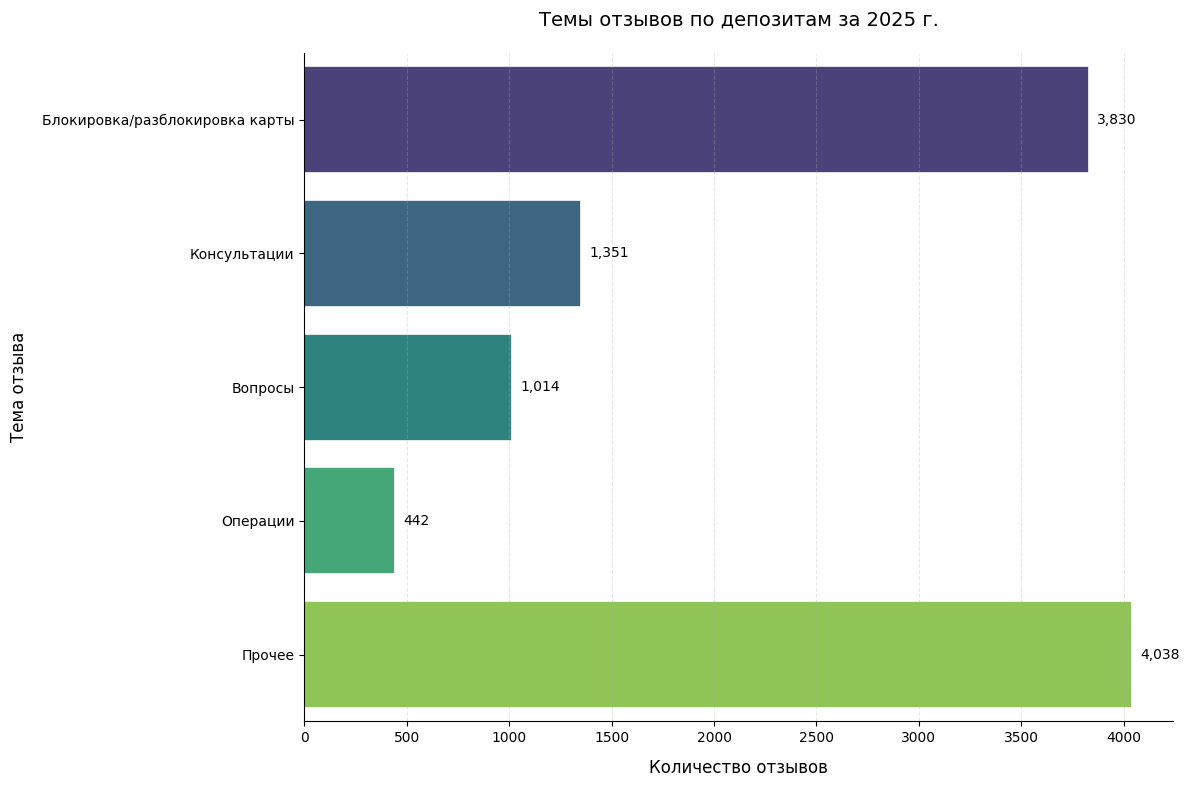

In [55]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Данные
deposit_category = ['Блокировка/разблокировка карты', 'Консультации', 'Вопросы', 'Операции', 'Прочее']
deposit_values = [3830, 1351, 1014, 442, 4038]

# Находим индекс категории "Прочее"
prochee_index = deposit_category.index('Прочее')
prochee_value = deposit_values[prochee_index]

# Создаем списки без "Прочее"
categories_without_prochee = [cat for i, cat in enumerate(deposit_category) if i != prochee_index]
values_without_prochee = [val for i, val in enumerate(deposit_values) if i != prochee_index]

# Сортируем остальные категории по убыванию (от большего к меньшему)
sorted_indices = np.argsort(values_without_prochee)[::-1]  # По убыванию
sorted_categories = [categories_without_prochee[i] for i in sorted_indices]
sorted_values = [values_without_prochee[i] for i in sorted_indices]

# Добавляем "Прочее" в конец
sorted_categories.append('Прочее')
sorted_values.append(prochee_value)

# Создаем DataFrame для удобства
df_deposit = pd.DataFrame({
    'Категория': sorted_categories,
    'Количество': sorted_values
})

# Строим горизонтальный barplot с отсортированными данными
sns.barplot(y=df_deposit['Категория'], 
            x=df_deposit['Количество'], 
            ax=ax,
            palette='viridis',
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Темы отзывов по депозитам за 2025 г.', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Тема отзыва', labelpad=10)

# Добавляем значения в конце столбцов
for i, v in enumerate(df_deposit['Количество']):
    ax.text(v + max(df_deposit['Количество'])*0.01, 
            i, 
            f'{v:,}', 
            va='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

### Инвестиции

In [56]:
final_result[final_result['business_line'] == 'Инвестиции']

,business_line,reason,subtheme,subtheme_count,reason_count
50,Инвестиции,Не определено,консультация по ценным бумагам,427,1593
51,Инвестиции,Не определено,консультация по интерфейсу,171,1593
52,Инвестиции,Не определено,условия акции,156,1593
53,Инвестиции,Не определено,корпоративные действия,111,1593
54,Инвестиции,Не определено,совершение сделок,110,1593
55,Инвестиции,Не определено,консультация по портфелю,73,1593
56,Инвестиции,Не определено,ошибки/сбои,72,1593
57,Инвестиции,Не определено,консультация по налогу,66,1593
58,Инвестиции,Не определено,комиссии,45,1593
59,Инвестиции,Не определено,отображается неверная информация,41,1593


Можно заметить в reason и subtheme общие темы. Глобально можно объединить их и составить новый топ причин обращений.

1. Консультации - 828 (суммарно).

   Объединяем: (любой reason, все, где есть слово консультация), (неверная консультация, все в этом reason)

2. Сделки/комиссии - 281 (суммарно).

   Объединяем: (не определено, корпоративные действия), (не определено, совершение сделок), (не определено, комиссии), (продукты по инвестициям, совершение сделок), (совершение сделок, совершение сделок)

3. Акции -  201 (суммарно).

   Объединяем: (не определено, условия акции), (акции, все в этом reason)

4. Ошибки/сбои/некорректная информация -  133 (суммарно).

   Объединяем: (не определено, ошибки/сбои), (не определено, отображается неверная информация), (продукты по инвестициям, некорректная коммуникация), (продукты по инвестициям, ошибки/сбои), (продукты по инвестициям, не отображается информация), (совершение сделок, некорректная коммуникация), (совершение сделок, не поступил звонок, уведомление, имейл), (совершение сделок, ошибки/сбои), (соверешение сделок, отображается неверная информация)

5. Прочее - 575 (2018 - суммарное число верхних обращений).

    В основном сюда падают обращения, у которых reason не определено. Чтобы учесть их стоит reason не определено раскрывать на большее число, а не на 5.

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\4122555954.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_invest['Категория'],


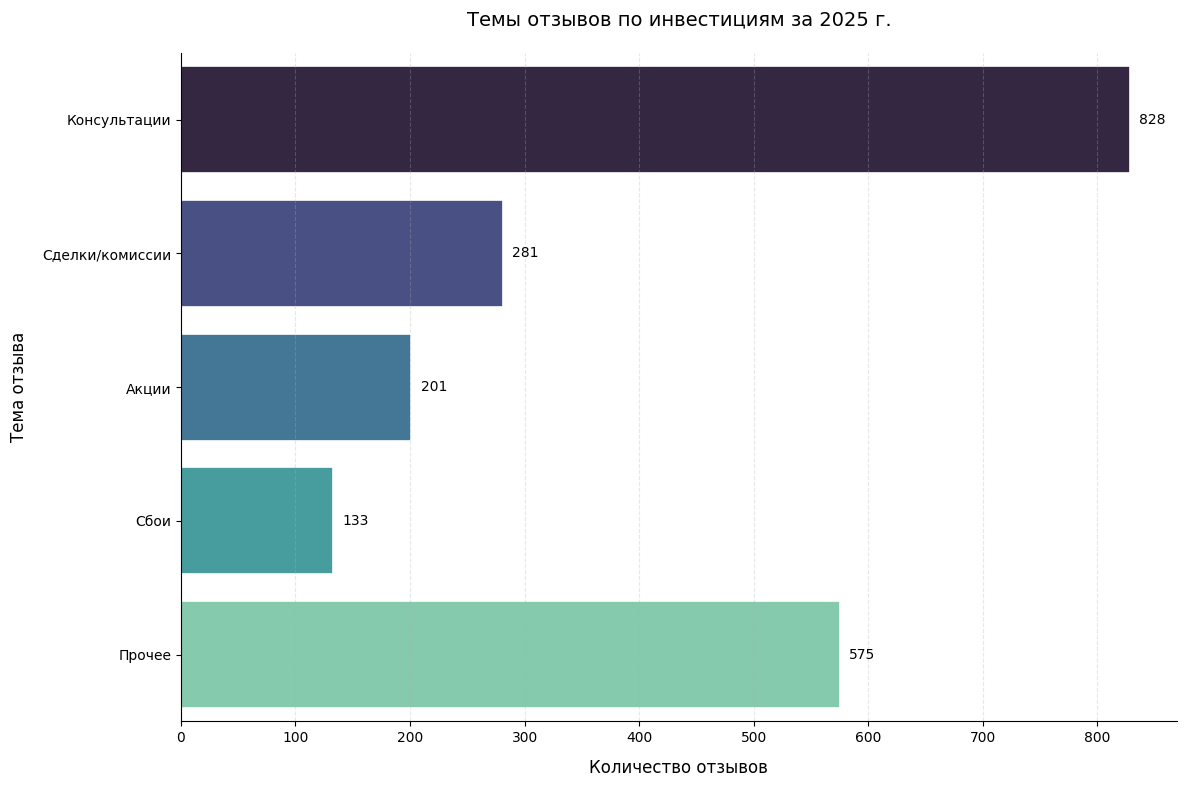

In [57]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Данные
invest_category = ['Консультации', 'Сделки/комиссии', 'Акции', 'Сбои', 'Прочее']
invest_values = [828, 281, 201, 133, 575]

# Находим индекс категории "Прочее"
prochee_index = invest_category.index('Прочее')
prochee_value = invest_values[prochee_index]

# Создаем списки без "Прочее"
categories_without_prochee = [cat for i, cat in enumerate(invest_category) if i != prochee_index]
values_without_prochee = [val for i, val in enumerate(invest_values) if i != prochee_index]

# Сортируем остальные категории по убыванию
sorted_indices = np.argsort(values_without_prochee)[::-1]  # По убыванию
sorted_categories = [categories_without_prochee[i] for i in sorted_indices]
sorted_values = [values_without_prochee[i] for i in sorted_indices]

# Добавляем "Прочее" в конец
sorted_categories.append('Прочее')
sorted_values.append(prochee_value)

# Создаем DataFrame для удобства
df_invest = pd.DataFrame({
    'Категория': sorted_categories,
    'Количество': sorted_values
})

# Строим горизонтальный barplot с отсортированными данными
sns.barplot(y=df_invest['Категория'], 
            x=df_invest['Количество'], 
            ax=ax,
            palette='mako',
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Темы отзывов по инвестициям за 2025 г.', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Тема отзыва', labelpad=10)

# Добавляем значения в конце столбцов
for i, v in enumerate(df_invest['Количество']):
    ax.text(v + max(df_invest['Количество'])*0.01, 
            i, 
            f'{v:,}', 
            va='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

### Кредиты

In [58]:
final_result[final_result['business_line'] == 'Кредиты']

,business_line,reason,subtheme,subtheme_count,reason_count
96,Кредиты,Не определено,отсрочки,381,3586
97,Кредиты,Не определено,график платежей,279,3586
98,Кредиты,Не определено,консультация по продукту,220,3586
99,Кредиты,Не определено,"клиент не хочет получать звонки, уведомления, ...",188,3586
100,Кредиты,Не определено,процентные ставки,127,3586
101,Кредиты,Не определено,дп/чдп,119,3586
102,Кредиты,Не определено,комиссии,114,3586
103,Кредиты,Не определено,оформление заявки,103,3586
104,Кредиты,Не определено,причина отказа,103,3586
105,Кредиты,Не определено,отмена / оспаривание,93,3586


Можно заметить в reason и subtheme общие темы. Глобально можно объединить их и составить новый топ причин обращений.

1. Платежи и график - 774 (суммарно).

    Объединяем: (любой reason, отсрочки/график птатежей/регулярный платеж/грейс период/внести платеж)

2. Вопросы по условиям - 395 (суммарно).

    Объединяем: (любой reason, процентные ставки/дп/чдп/комиссии)

3. Заявки - 305 (суммарно).

    Объединяем: (reason заявки), (не определено, оформление заявки/причина отказа), (повторное обращение, залог)

4. Консультации - 265 (суммарно).

    Объединяем: (любой reason, включаем все, где есть слово "консультация")

5. Прочее - 2740 (4479 - суммарное число верхних обращений).

    В основном сюда падают обращения, у которых reason не определено. Чтобы учесть их стоит reason не определено раскрывать на большее число, а не на 5.

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\519231173.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_credit['Категория'],


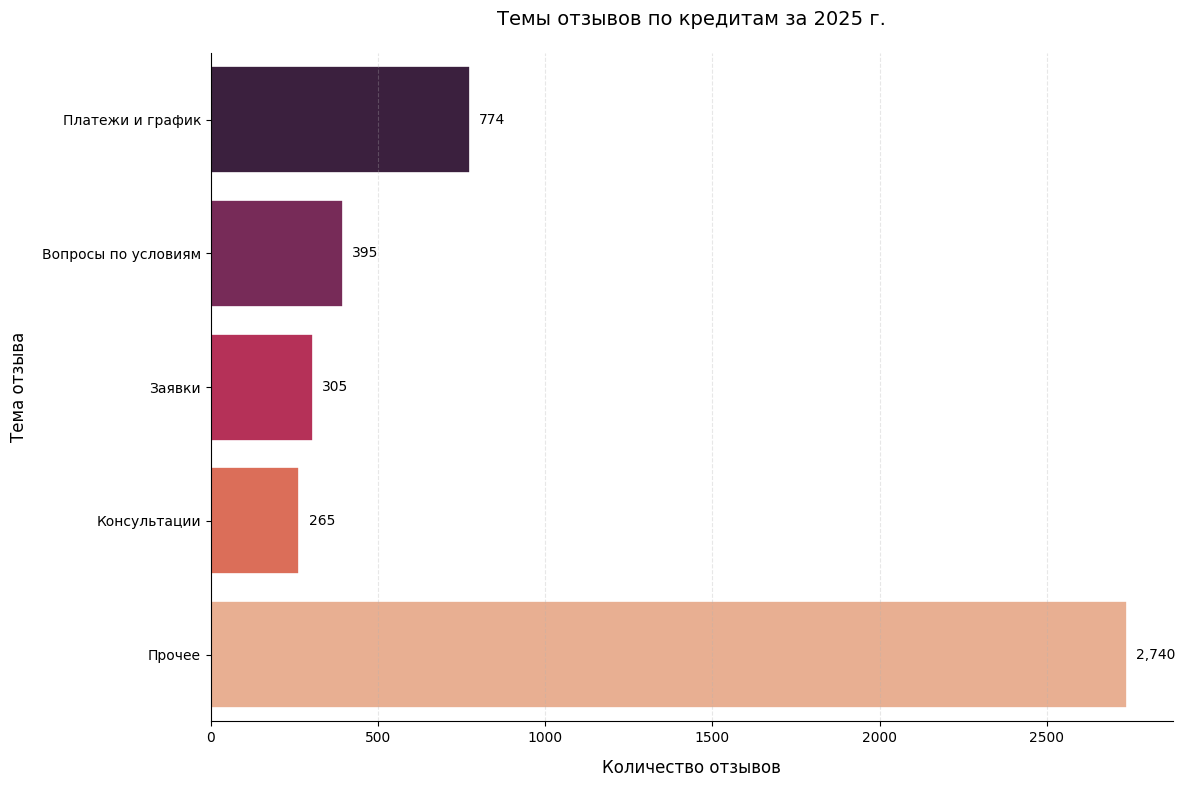

In [59]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Данные
credit_category = ['Платежи и график', 'Вопросы по условиям', 'Заявки', 'Консультации', 'Прочее']
credit_values = [774, 395, 305, 265, 2740]

# Находим индекс категории "Прочее"
prochee_index = credit_category.index('Прочее')
prochee_value = credit_values[prochee_index]

# Создаем списки без "Прочее"
categories_without_prochee = [cat for i, cat in enumerate(credit_category) if i != prochee_index]
values_without_prochee = [val for i, val in enumerate(credit_values) if i != prochee_index]

# Сортируем остальные категории по убыванию (от большего к меньшему)
sorted_indices = np.argsort(values_without_prochee)[::-1]  # По убыванию
sorted_categories = [categories_without_prochee[i] for i in sorted_indices]
sorted_values = [values_without_prochee[i] for i in sorted_indices]

# Добавляем "Прочее" в конец
sorted_categories.append('Прочее')
sorted_values.append(prochee_value)

# Создаем DataFrame для удобства
df_credit = pd.DataFrame({
    'Категория': sorted_categories,
    'Количество': sorted_values
})

# Строим горизонтальный barplot с отсортированными данными
sns.barplot(y=df_credit['Категория'], 
            x=df_credit['Количество'], 
            ax=ax,
            palette='rocket',  # Другая палитра для отличия от предыдущих графиков
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Темы отзывов по кредитам за 2025 г.', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Тема отзыва', labelpad=10)

# Добавляем значения в конце столбцов
for i, v in enumerate(df_credit['Количество']):
    ax.text(v + max(df_credit['Количество'])*0.01, 
            i, 
            f'{v:,}', 
            va='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

### Страхование

In [60]:
final_result[final_result['business_line'] == 'Страхование']

,business_line,reason,subtheme,subtheme_count,reason_count
146,Страхование,Не определено,жалоба по страховому случаю,675,1180
147,Страхование,Не определено,отморозки,153,1180
148,Страхование,Не определено,оформление заявки,90,1180
149,Страхование,Не определено,изменения в полисе,42,1180
150,Страхование,Не определено,расчет стоимости,31,1180
151,Страхование,Не определено,бонус не начислен,27,1180
152,Страхование,Не определено,не согласен со стоимостью,22,1180
153,Страхование,Не определено,пролонгация,20,1180
154,Страхование,Не определено,условия,20,1180
155,Страхование,Не определено,включить в акцию,13,1180


Можно заметить в reason и subtheme общие темы. Глобально можно объединить их и составить новый топ причин обращений.

1. Жалобы - 685 (суммарно).

    Объединяем: (любой reason, жалобы по страховому случаю)

2. Отморозки - 154 (суммарно).

    Объединяем: (любой reason, отмороженные)

3. Вопросы по оформлению - 93 (суммарно).

    Объединяем: (не определено, оформление заявки), (оформление полиса, причина отказа/оплата продукта)

4. Внесение изменений - 47 (суммарно).

    Объединяем: (любой reason, изменения в полисе)

5. Расчет стоимости - 53 (суммарно)

   Объединяем: (не определено, расчет стоимости/не согласен со стоимостью)

6. Прочее - 188 (1220 - суммарное число верхних обращений).

В основном сюда падают обращения, у которых reason не определено. Чтобы учесть их стоит reason не определено раскрывать на большее число, а не на 5.

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\3443352726.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_insur['Категория'],


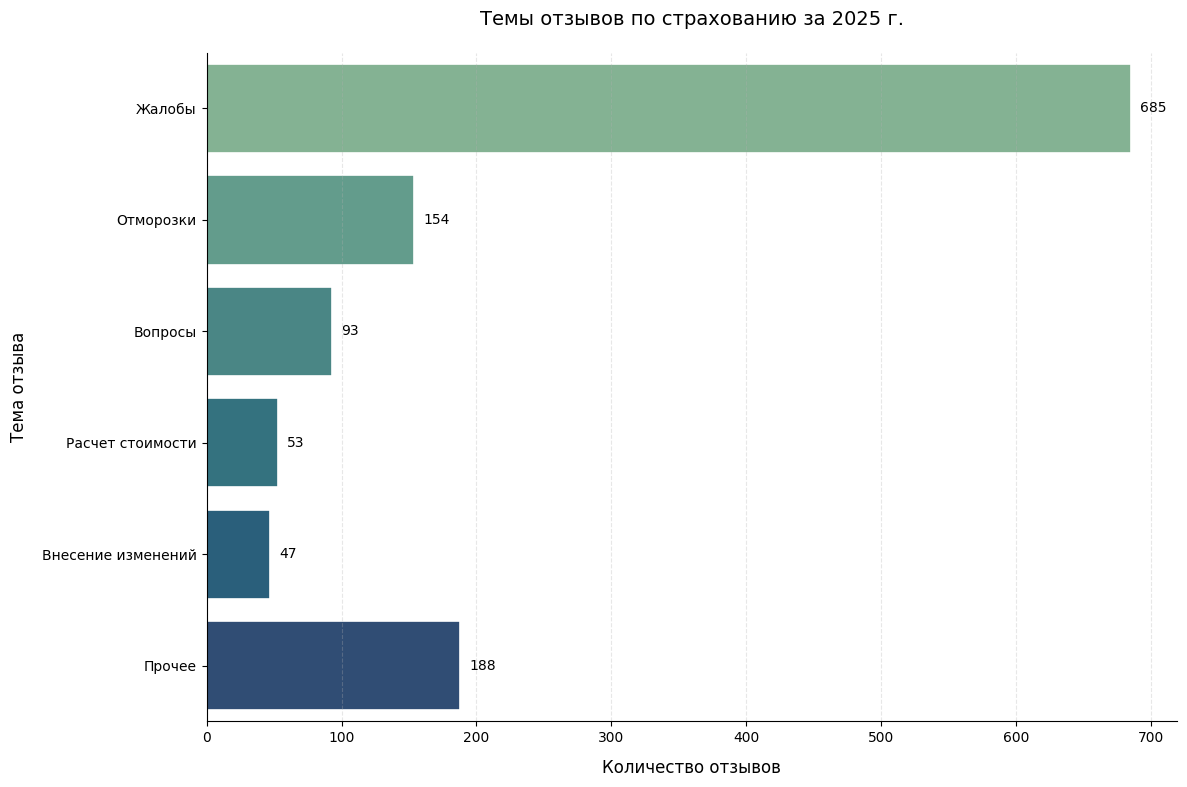

In [61]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Данные
insur_category = ['Жалобы', 'Отморозки', 'Вопросы', 'Внесение изменений', 'Расчет стоимости', 'Прочее']
insur_values = [685, 154, 93, 47, 53, 188]

# Находим индекс категории "Прочее"
prochee_index = insur_category.index('Прочее')
prochee_value = insur_values[prochee_index]

# Создаем списки без "Прочее"
categories_without_prochee = [cat for i, cat in enumerate(insur_category) if i != prochee_index]
values_without_prochee = [val for i, val in enumerate(insur_values) if i != prochee_index]

# Сортируем остальные категории по убыванию (от большего к меньшему)
sorted_indices = np.argsort(values_without_prochee)[::-1]  # По убыванию
sorted_categories = [categories_without_prochee[i] for i in sorted_indices]
sorted_values = [values_without_prochee[i] for i in sorted_indices]

# Добавляем "Прочее" в конец
sorted_categories.append('Прочее')
sorted_values.append(prochee_value)

# Создаем DataFrame для удобства
df_insur = pd.DataFrame({
    'Категория': sorted_categories,
    'Количество': sorted_values
})

# Строим горизонтальный barplot с отсортированными данными
sns.barplot(y=df_insur['Категория'], 
            x=df_insur['Количество'], 
            ax=ax,
            palette='crest',  # Еще одна градиентная палитра
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Темы отзывов по страхованию за 2025 г.', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Тема отзыва', labelpad=10)

# Добавляем значения в конце столбцов
for i, v in enumerate(df_insur['Количество']):
    ax.text(v + max(df_insur['Количество'])*0.01, 
            i, 
            f'{v:,}', 
            va='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

### Услуги и сервис

In [62]:
final_result[final_result['business_line'] == 'Услуги и сервис']

,business_line,reason,subtheme,subtheme_count,reason_count
178,Услуги и сервис,Не определено,Не определено,814,2516
179,Услуги и сервис,Не определено,консультация по продукту,437,2516
180,Услуги и сервис,Не определено,"клиент не хочет получать звонки, уведомления, ...",113,2516
181,Услуги и сервис,Не определено,годовое/ежемесячное обслуживание,64,2516
182,Услуги и сервис,Не определено,комиссии,59,2516
183,Услуги и сервис,Не определено,возвраты,48,2516
184,Услуги и сервис,Не определено,не согласен со стоимостью,47,2516
185,Услуги и сервис,Не определено,консультация по заказу,45,2516
186,Услуги и сервис,Не определено,не был начислен,45,2516
187,Услуги и сервис,Не определено,некорректная коммуникация,45,2516


Можно заметить в reason и subtheme общие темы. Глобально можно объединить их и составить новый топ причин обращений.

1. Консультации по продуктам и услугам - 560 (суммарно).

    Объединяем: (любой reason, все, где есть слово консультация), (общая информация, график платежей/внести платеж/статус/когда закроется)


2. Вопросы по комиссиям и стоимости обсуживания - 183 (суммарно).

    Объединяем: (не определено, комиссии), (не определено, годовое/ежемесячное обслуживание), (не определено, не согласен со стоимостью), (общая информация, комиссии), (общая информация, годовое/ежемесячное обслуживание)


3. Проблемы с качеством связи - 67 (суммарно)

    Объединяем: (качество связи, все, что входит в этот reason)

   
4. Проблемы, связанные с акциями и бонусами - 57 (суммарно).

    Объединяем: (акции, все, что входит в акции и не вышло в верхнее)


5. AML-ограничения и запросы документов - 45 (суммарно).

    Объединяем: (aml, все, что входит в aml и не вошло в верхнее


6. Прочее - 2994 (3906 - суммарное число верхних обращений).

    В основном сюда падают обращения, у которых reason не определено. Чтобы учесть их стоит reason не определено раскрывать на большее число, а не на 5.

C:\Users\Ivan Chalov\AppData\Local\Temp\ipykernel_9432\375156759.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_service['Категория'],


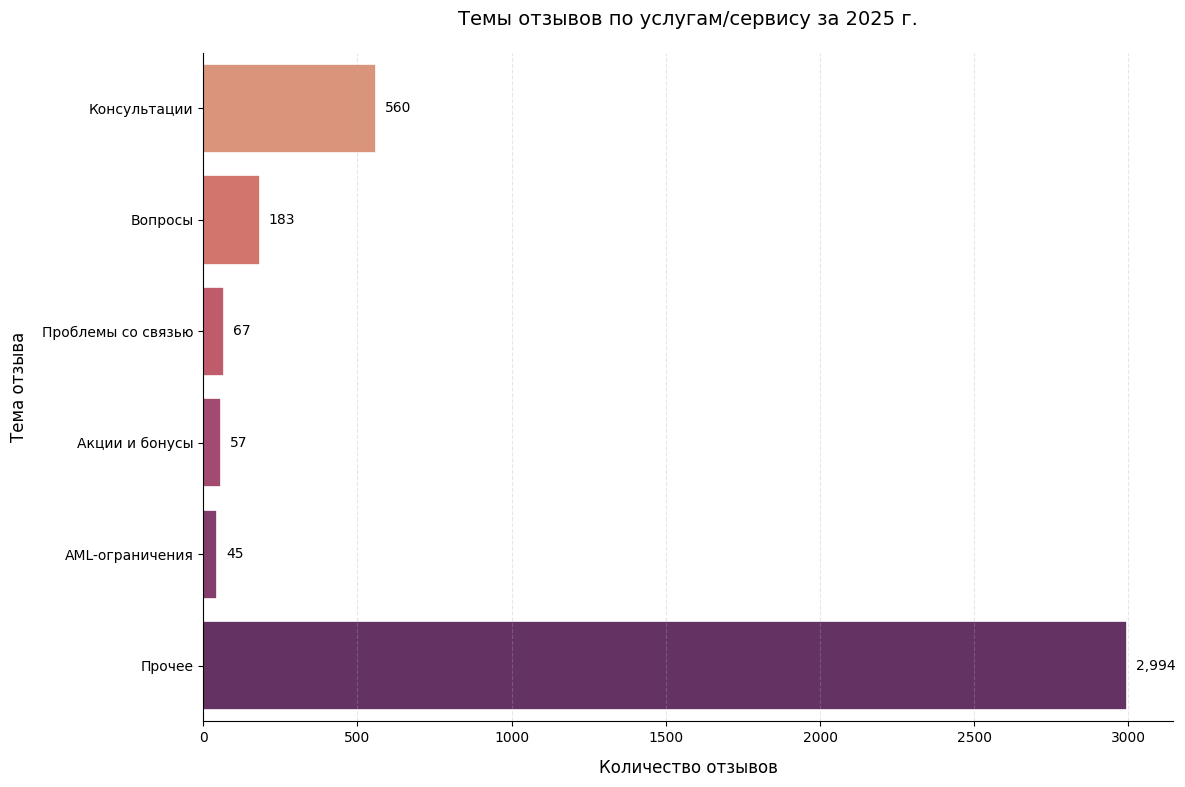

In [63]:
# Создаем фигуру и ось
fig, ax = plt.subplots(figsize=(12, 8))

# Данные
service_category = ['Консультации', 'Вопросы', 'Проблемы со связью', 'Акции и бонусы', 'AML-ограничения', 'Прочее']
service_values = [560, 183, 67, 57, 45, 2994]

# Находим индекс категории "Прочее"
prochee_index = service_category.index('Прочее')
prochee_value = service_values[prochee_index]

# Создаем списки без "Прочее"
categories_without_prochee = [cat for i, cat in enumerate(service_category) if i != prochee_index]
values_without_prochee = [val for i, val in enumerate(service_values) if i != prochee_index]

# Сортируем остальные категории по убыванию (от большего к меньшему)
sorted_indices = np.argsort(values_without_prochee)[::-1]  # По убыванию
sorted_categories = [categories_without_prochee[i] for i in sorted_indices]
sorted_values = [values_without_prochee[i] for i in sorted_indices]

# Добавляем "Прочее" в конец
sorted_categories.append('Прочее')
sorted_values.append(prochee_value)

# Создаем DataFrame для удобства
df_service = pd.DataFrame({
    'Категория': sorted_categories,
    'Количество': sorted_values
})

# Строим горизонтальный barplot с отсортированными данными
sns.barplot(y=df_service['Категория'], 
            x=df_service['Количество'], 
            ax=ax,
            palette='flare',  # Оранжево-красная палитра
            edgecolor='white',
            linewidth=1.2,
            orient='h')

# Настройка осей и заголовка
ax.set_title('Темы отзывов по услугам/сервису за 2025 г.', 
             pad=20, 
             fontweight='medium')
ax.set_xlabel('Количество отзывов', labelpad=10)
ax.set_ylabel('Тема отзыва', labelpad=10)

# Добавляем значения в конце столбцов
for i, v in enumerate(df_service['Количество']):
    ax.text(v + max(df_service['Количество'])*0.01, 
            i, 
            f'{v:,}', 
            va='center', 
            fontsize=10,
            fontweight='medium')

# Добавляем легкую сетку
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Настраиваем отступы
plt.tight_layout()
plt.show()

## Выводы

Блокировкам/разблокировкам карты - самая большая тема среди негативных отзывов.

Консультации и вопросы - это общая тема для всех бизнес-направлений.

# Продуктовые гипотезы

1.	Добавление на экране карты интерактивного счетчика кэшбека (по этой карте вы получите X рублей, Y уже начислено; пункт “как считаем?”) уменьшит долю вопросов по кэшбеку.
  
2.	Размещение в мобильном приложении трекер блокировки с конкретными шагами для разблокировки (“карта приостановлена из-за операции …” – “для разблокировки подтвердите эти 3 транзакции” – “после подтверждения карта разблокируется автоматически через 2 минуты”), то количество отзывов на тему блокировки/разблокировки карты уменьшится.

Наиболее **перспективной** считаю 2 гипотезу, потому что больше большинство негативных отзывов связано с блокировкой/разблокировкой карты. 

# A/B эксперимент

## Гипотеза

$H_0$: внедрение трекера не повлияет на долю пользователей, обращающихся в поддержку о разблокировки/блокировки карты

$H_1$: внедрение трекера уменьшит долю пользователей, обращающихся в поддержку о разблокировки/блокировки карты

## Метрики

Целевая метрика: доля пользователей, оставляющих негативный отзыв.

Прокси метрика: доля пользователей, обращающихся в поддержку по поводу разблокировки/блокировки карты

Защитная метрика: отток, доля обращений в поддержку по поводу блокировки/разблокировки карты

## Рандомизации

Будем отбирать активных пользователей, кто пользуется дебетовой картой. Пользователя будем считать активным, если в течение месяца он получает деньги на карту. 

Распределяем пользователей в 2 группы: A – текущий опыт, B – опыт с трекером. Сплит 50% на 50%. 

## Характеристики

Альфа 0,05.

Мощность 80%.

MDE нужно смотреть по прошлому опыту.

Размер выборки: определим по калькулятору, когда уточним MDE.

Длительность: определим исходя из требуемого размера выборки.

# Использование ИИ

Использовал его, чтобы сделать графики более менее красивыми. До этого сделал их быстро одной строкой, а он их уже украшал, приводил в порядок. Мне не хотелось тратить время на написание всего этого кода. Так вышло гораздо быстрее.

Больше нигде его не использовал.